# FIFA19 PLAYERS VISUALITAZION PROJECT

### 0.- Environment

All the imports and notebook settings are in this section

In [1]:
###DATAFRAME###
import numpy as np
import pandas as pd

###VISUALIZATION###
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import interact
import plotly.graph_objs as go
cf.go_offline()

###SYSTEM###
import warnings
warnings.filterwarnings('ignore')


### 1.- The dataset: FIFA19 players details

#### 1.1. Download and unzip the dataset from  https://www.kaggle.com/karangadiya/fifa19/downloads/fifa19.zip/4

#### 1.2. Insert the dataset in a pandas dataframe data

In [2]:
fifa = pd.read_csv("data/data.csv")

#### 1.3. Overview of the dataset and ir characteristics

In [3]:
fifa.shape

(18207, 89)

In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
fifa.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [7]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


#### 1.4. Data cleaning

I create a copy of the dataframe for cleaning purposes

In [8]:
data = fifa

##### 1.4.1 Columns

Delete the columns of the index duplicate and the columns I'm not going to use

In [9]:
data = data.drop('Unnamed: 0', axis=1)

In [10]:
data = data.drop('Release Clause', axis=1)

In [11]:
data = data.drop('Joined', axis=1)

In [12]:
data = data.drop('Loaned From', axis=1)

In [13]:
data = data.drop('Contract Valid Until', axis=1)

In [14]:
data = data.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1)


In [15]:
data = data.drop('Special', axis=1)

In [16]:
data = data.drop('Club Logo', axis=1)

In [17]:
data = data.drop('Body Type', axis=1)

In [18]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,€110.5M,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,€77M,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,€118.5M,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,€72M,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,€102M,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [19]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Real Face', 'Position', 'Jersey Number', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

##### 1.4.1.2 Fill the non available data of the columns

In [20]:
data.loc[data['Club'].isna()].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,NaN,€0,...,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,NaN,€0,...,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,NaN,€0,...,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,NaN,€0,...,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,NaN,€0,...,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0


In [21]:
data['Club'].loc[data['Club'].isna()] = 'NoClub'

In [22]:
data[data['Club'] == 'NoClub'].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,NoClub,€0,...,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,NoClub,€0,...,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,NoClub,€0,...,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,NoClub,€0,...,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,NoClub,€0,...,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0


In [23]:
data['Position'].loc[data['Position'].isna()] = 'NoPosition'

In [24]:
data[data['Position'] == 'NoPosition'].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NoClub,€0,...,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NoClub,€0,...,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NoClub,€0,...,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NoClub,€0,...,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NoClub,€0,...,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0


In [25]:
data['Jersey Number'].loc[data['Jersey Number'].isna()] = 0

In [26]:
data[data['Jersey Number'] == 0].head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NoClub,€0,...,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NoClub,€0,...,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NoClub,€0,...,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NoClub,€0,...,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NoClub,€0,...,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0


##### 1.4.1.3 Transform the necessary data

In [27]:
def transform_money(val):
    euros = val.replace('€', '')
    if 'M' in euros:
        euros = euros.replace('M', '')
        euros = float(euros)*1000000
    elif 'K' in euros:
        euros = euros.replace('K', '')
        euros = float(euros)*1000
    return float(euros)

In [28]:
data['Value_euros'] =  data['Value'].apply(transform_money)

In [29]:
data['Wage_euros'] =  data['Wage'].apply(transform_money)

In [30]:
data['Yearly_Wage_euros'] =  data['Wage_euros'].apply(lambda x: x*52)

In [31]:
data[['ID','Name','Value','Value_euros','Wage','Wage_euros','Yearly_Wage_euros']].head()

,ID,Name,Value,Value_euros,Wage,Wage_euros,Yearly_Wage_euros
0,158023,L. Messi,€110.5M,110500000.0,€565K,565000.0,29380000.0
1,20801,Cristiano Ronaldo,€77M,77000000.0,€405K,405000.0,21060000.0
2,190871,Neymar Jr,€118.5M,118500000.0,€290K,290000.0,15080000.0
3,193080,De Gea,€72M,72000000.0,€260K,260000.0,13520000.0
4,192985,K. De Bruyne,€102M,102000000.0,€355K,355000.0,18460000.0


##### 1.4.2 Rows

There are 48 rows (players) with almost all the data NaN. I will delete those rows as they do not give iformation for the visualisation purpose.

In [32]:
data = data.drop(data.index[data[data['Preferred Foot'].isna()].index])

#### 1.5 Clean dataset

We have a dataset that we are going to use for the visualization

In [33]:
data.shape

(18159, 58)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 58 columns):
ID                          18159 non-null int64
Name                        18159 non-null object
Age                         18159 non-null int64
Photo                       18159 non-null object
Nationality                 18159 non-null object
Flag                        18159 non-null object
Overall                     18159 non-null int64
Potential                   18159 non-null int64
Club                        18159 non-null object
Value                       18159 non-null object
Wage                        18159 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Real Face                   18159 non-null object
Position                    18159 non-null

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18159.0,2.142796e+05,2.996846e+04,16.0,200300.0,221743.0,236508.5,246620.0
Age,18159.0,2.512253e+01,4.670568e+00,16.0,21.0,25.0,28.0,45.0
Overall,18159.0,6.624990e+01,6.914613e+00,46.0,62.0,66.0,71.0,94.0
Potential,18159.0,7.131913e+01,6.134420e+00,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222e+00,3.940308e-01,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299e+00,6.604563e-01,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308e+00,7.561641e-01,1.0,2.0,2.0,3.0,5.0
Jersey Number,18159.0,1.953318e+01,1.595041e+01,0.0,8.0,17.0,26.0,99.0
Crossing,18159.0,4.973418e+01,1.836452e+01,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,4.555091e+01,1.952582e+01,2.0,30.0,49.0,62.0,95.0


### 2.- Visualization

#### 2.1.- Distribution of the Players by Overall rating

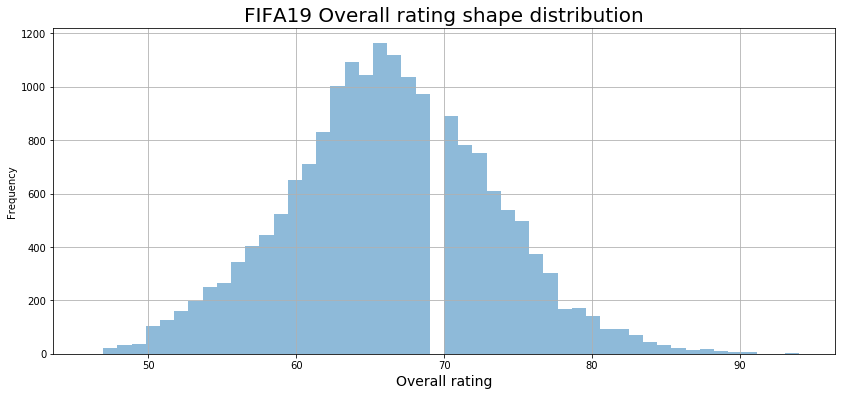

In [36]:
plt.figure(figsize = (14,6))
data['Overall'].plot.hist(alpha=0.5, bins=50, grid=True, legend=None)
plt.xlabel('Overall rating', fontsize=14, ha='center')
plt.title('FIFA19 Overall rating shape distribution', fontsize=20)
plt.show()

We can observe that the distribution seems almost a "Nomal distribution"

#### 2.2.- Players Preferred Foot


In [37]:
data[['ID','Preferred Foot']].groupby('Preferred Foot').count()

,ID
Preferred Foot,
Left,4211
Right,13948


In [38]:
prefered_foot = data[['ID','Preferred Foot']].groupby('Preferred Foot').count().reset_index()

<Figure size 1008x432 with 0 Axes>

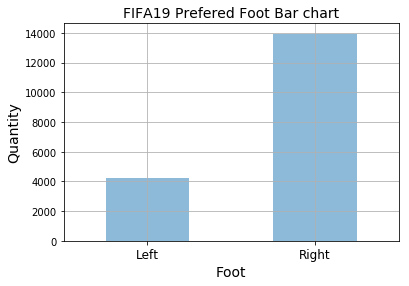

In [39]:
plt.figure(figsize = (14,6))
prefered_foot.plot.bar(alpha=0.5, grid=True, legend=None)
plt.xlabel('Foot', fontsize=14, ha='center')
plt.ylabel('Quantity', fontsize=14, ha='center')
plt.xticks([0,1], ['Left', 'Right'], fontsize=12, ha='center', rotation=0)
plt.title('FIFA19 Prefered Foot Bar chart', fontsize=14)
plt.show()

There are the triple of players with the Right foot as preferred

#### ¿Is there any difference for the overall distribution?

In [40]:
lefties = data[data['Preferred Foot'] == 'Left']
righties = data[data['Preferred Foot'] == 'Right']

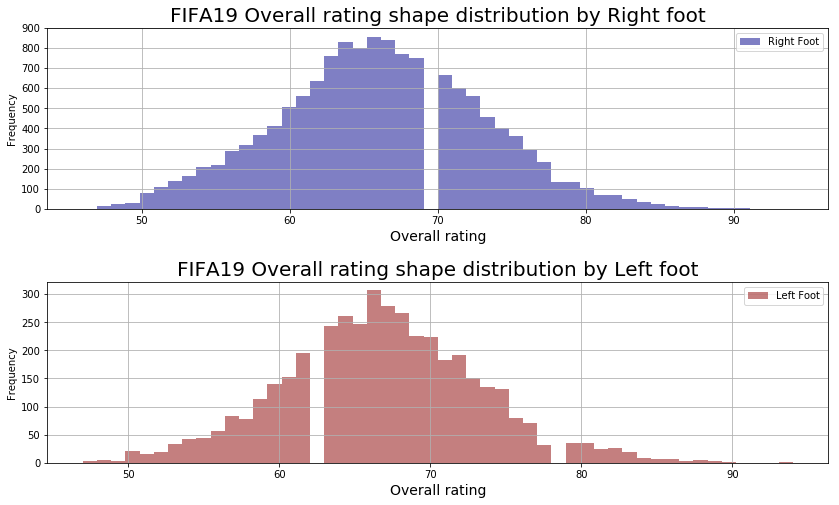

In [41]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize = (14,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.sca(ax1)
righties['Overall'].plot.hist(alpha=0.5, bins=50, grid=True, label='Right Foot', color='darkblue')
plt.xlabel('Overall rating', fontsize=14, ha='center')
plt.title('FIFA19 Overall rating shape distribution by Right foot', fontsize=20)
plt.legend()

plt.sca(ax2)
lefties['Overall'].plot.hist(alpha=0.5, bins=50, grid=True, label='Left Foot', color='darkred')
plt.xlabel('Overall rating', fontsize=14, ha='center')
plt.title('FIFA19 Overall rating shape distribution by Left foot', fontsize=20)
plt.legend()
plt.show()

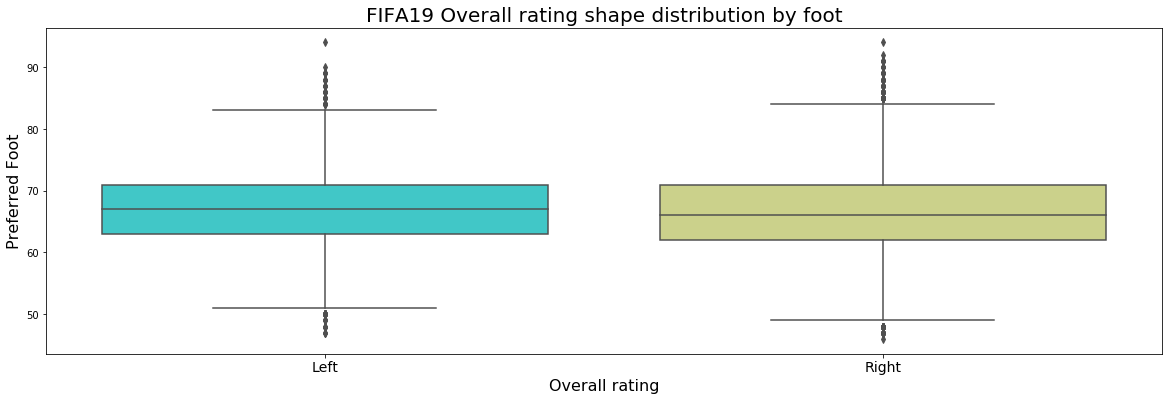

In [42]:
plt.figure(figsize = (20,6))

sns.boxplot(x='Preferred Foot', y='Overall', data=data,palette='rainbow')
plt.title('FIFA19 Overall rating shape distribution by foot', fontsize=20)
plt.xlabel('Overall rating', fontsize=16, ha='center')
plt.ylabel('Preferred Foot', fontsize=16, ha='center')
plt.xticks([0,1], ['Left', 'Right'], fontsize=14, ha='center', rotation=0)
plt.show()

We can observe that the distributions seem pretty similar

#### 2.3.- Heatmap correlation of all the the values 

In [43]:
corr = data.corr()

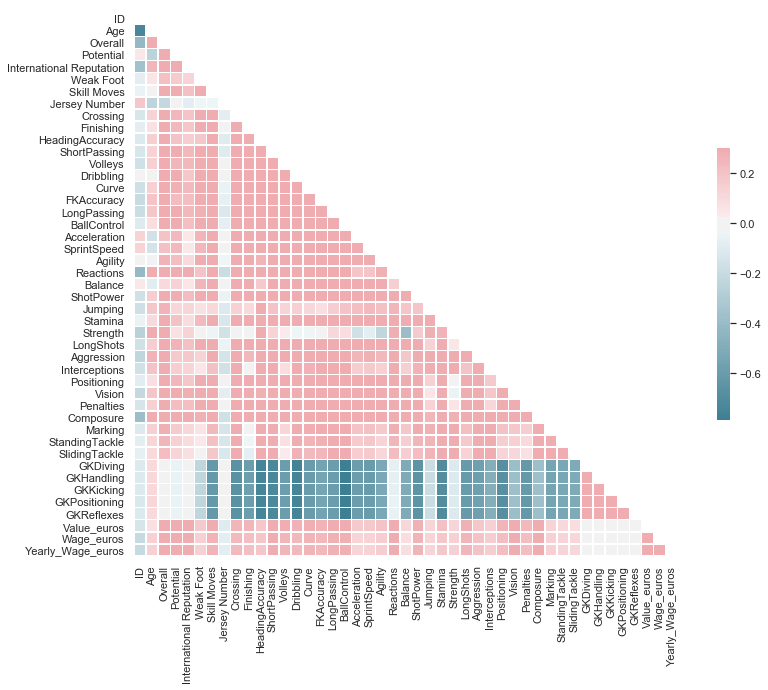

In [44]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=1)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### 2.4.- Correlation of Overall and the rest of the values 

In [45]:
corr_overall = corr['Overall'].reset_index()

In [46]:
corr_overall.head()

,index,Overall
0,ID,-0.417354
1,Age,0.453069
2,Overall,1.000000
3,Potential,0.661180
4,International Reputation,0.499491


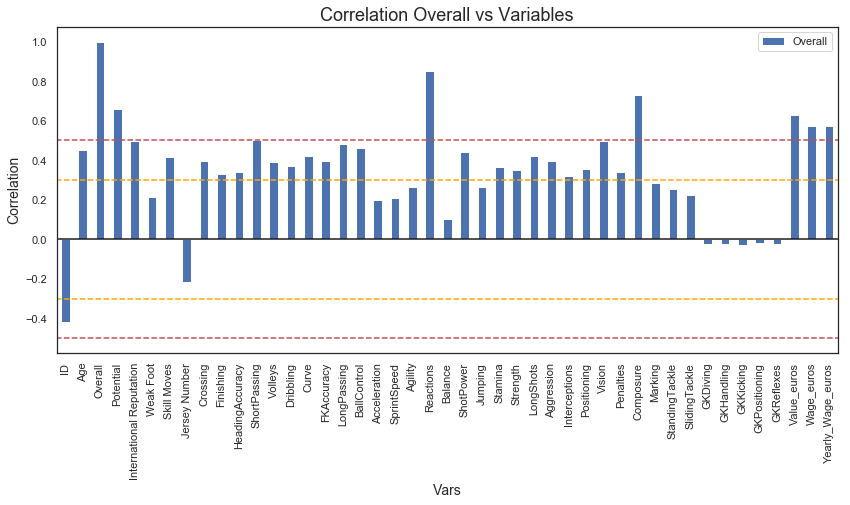

In [47]:
sns.set(style="white")
corr_overall.plot(kind='bar',figsize=(14,6))
plt.title("Correlation Overall vs Variables", fontsize=18, fontweight=400, ha='center')
plt.xlabel('Vars', fontsize=14, ha='center')
plt.ylabel('Correlation', fontsize=14, ha='center')
plt.xticks(np.arange(45), corr_overall['index'], rotation=90)
plt.hlines(0.5,-1,45, colors='r',linestyles='dashed', label='0.5')
plt.hlines(-0.5,-1,45, colors='r',linestyles='dashed', label='-0.5')
plt.hlines(0.3,-1,45, colors='orange',linestyles='dashed', label='0.3')
plt.hlines(-0.3,-1,45, colors='orange',linestyles='dashed', label='-0.3')
plt.hlines(0,-1,45, colors='k',linestyles='solid')
plt.show()

#### 2.5.- Scatter plots of Overall vs Composure, Reactions and Potential

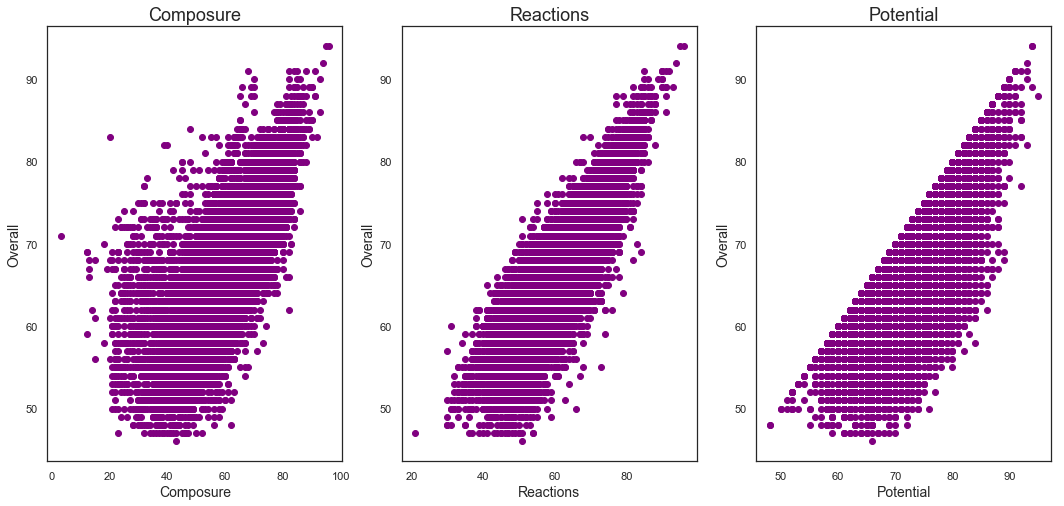

In [49]:
list_plots = ['Composure', 'Reactions','Potential','Overall']

fig, ax = plt.subplots(1,3, figsize = (18,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)


for i in range(3):
    plt.sca(ax[i])
    plt.scatter(data[list_plots[i]], data[list_plots[3]], color = 'purple')
    plt.title(list_plots[i], fontsize=18, fontweight=400, ha='center')
    plt.xlabel(list_plots[i], fontsize=14, ha='center')
    plt.ylabel(list_plots[3], fontsize=14, ha='center')
plt.show()

#### 2.6.- Average Overall and Wage by Club

In [94]:
data3 = data.groupby('Club')[['Overall','Wage_euros']].mean()
data3 = data3.reset_index()

In [95]:
data3.iplot(x='Overall', y='Wage_euros', categories='Club',
           xTitle='Overall', yTitle='Wage in euros',
           title='Average Overall and Wage by Club')

#### 2.7.- Average Value in Euros and Overall by Nationality

In [92]:
data4 = data.groupby('Nationality')[['Overall','Value_euros']].mean()
data4 = data4.reset_index()

In [93]:
data4.iplot(x='Overall', y='Value_euros', categories='Nationality',
           xTitle='Overall', yTitle='Value in euros',
           title='Average Overall and Value by Nationality')

#### 2.8.- Interactive Players from Club

In [119]:
@interact(Club='')
def select_club(Club):
    data5 = data[data['Club'].str.contains(Club)]
    data5 = data5.groupby('Club').agg({'Value_euros':'sum'}).reset_index()
    data5 = data5.sort_values(by='Value_euros', ascending=False)
    
    data5.iplot(kind='bar', x='Club', y='Value_euros', title='Total value of players by Club', theme='white', world_readable=True, color='blue')


interactive(children=(Text(value='', description='Club'), Output()), _dom_classes=('widget-interact',))